# **Goal Of the Project**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

In [1]:
# list of library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

# **Task 1: EDA**

In [2]:
# Mounting the drive for reading the .csv files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path= '/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Information Regarding the comparison class***


*From this we can see the Target Class is* **SalePrice**

In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<ipython-input-47-949ec04c2e46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


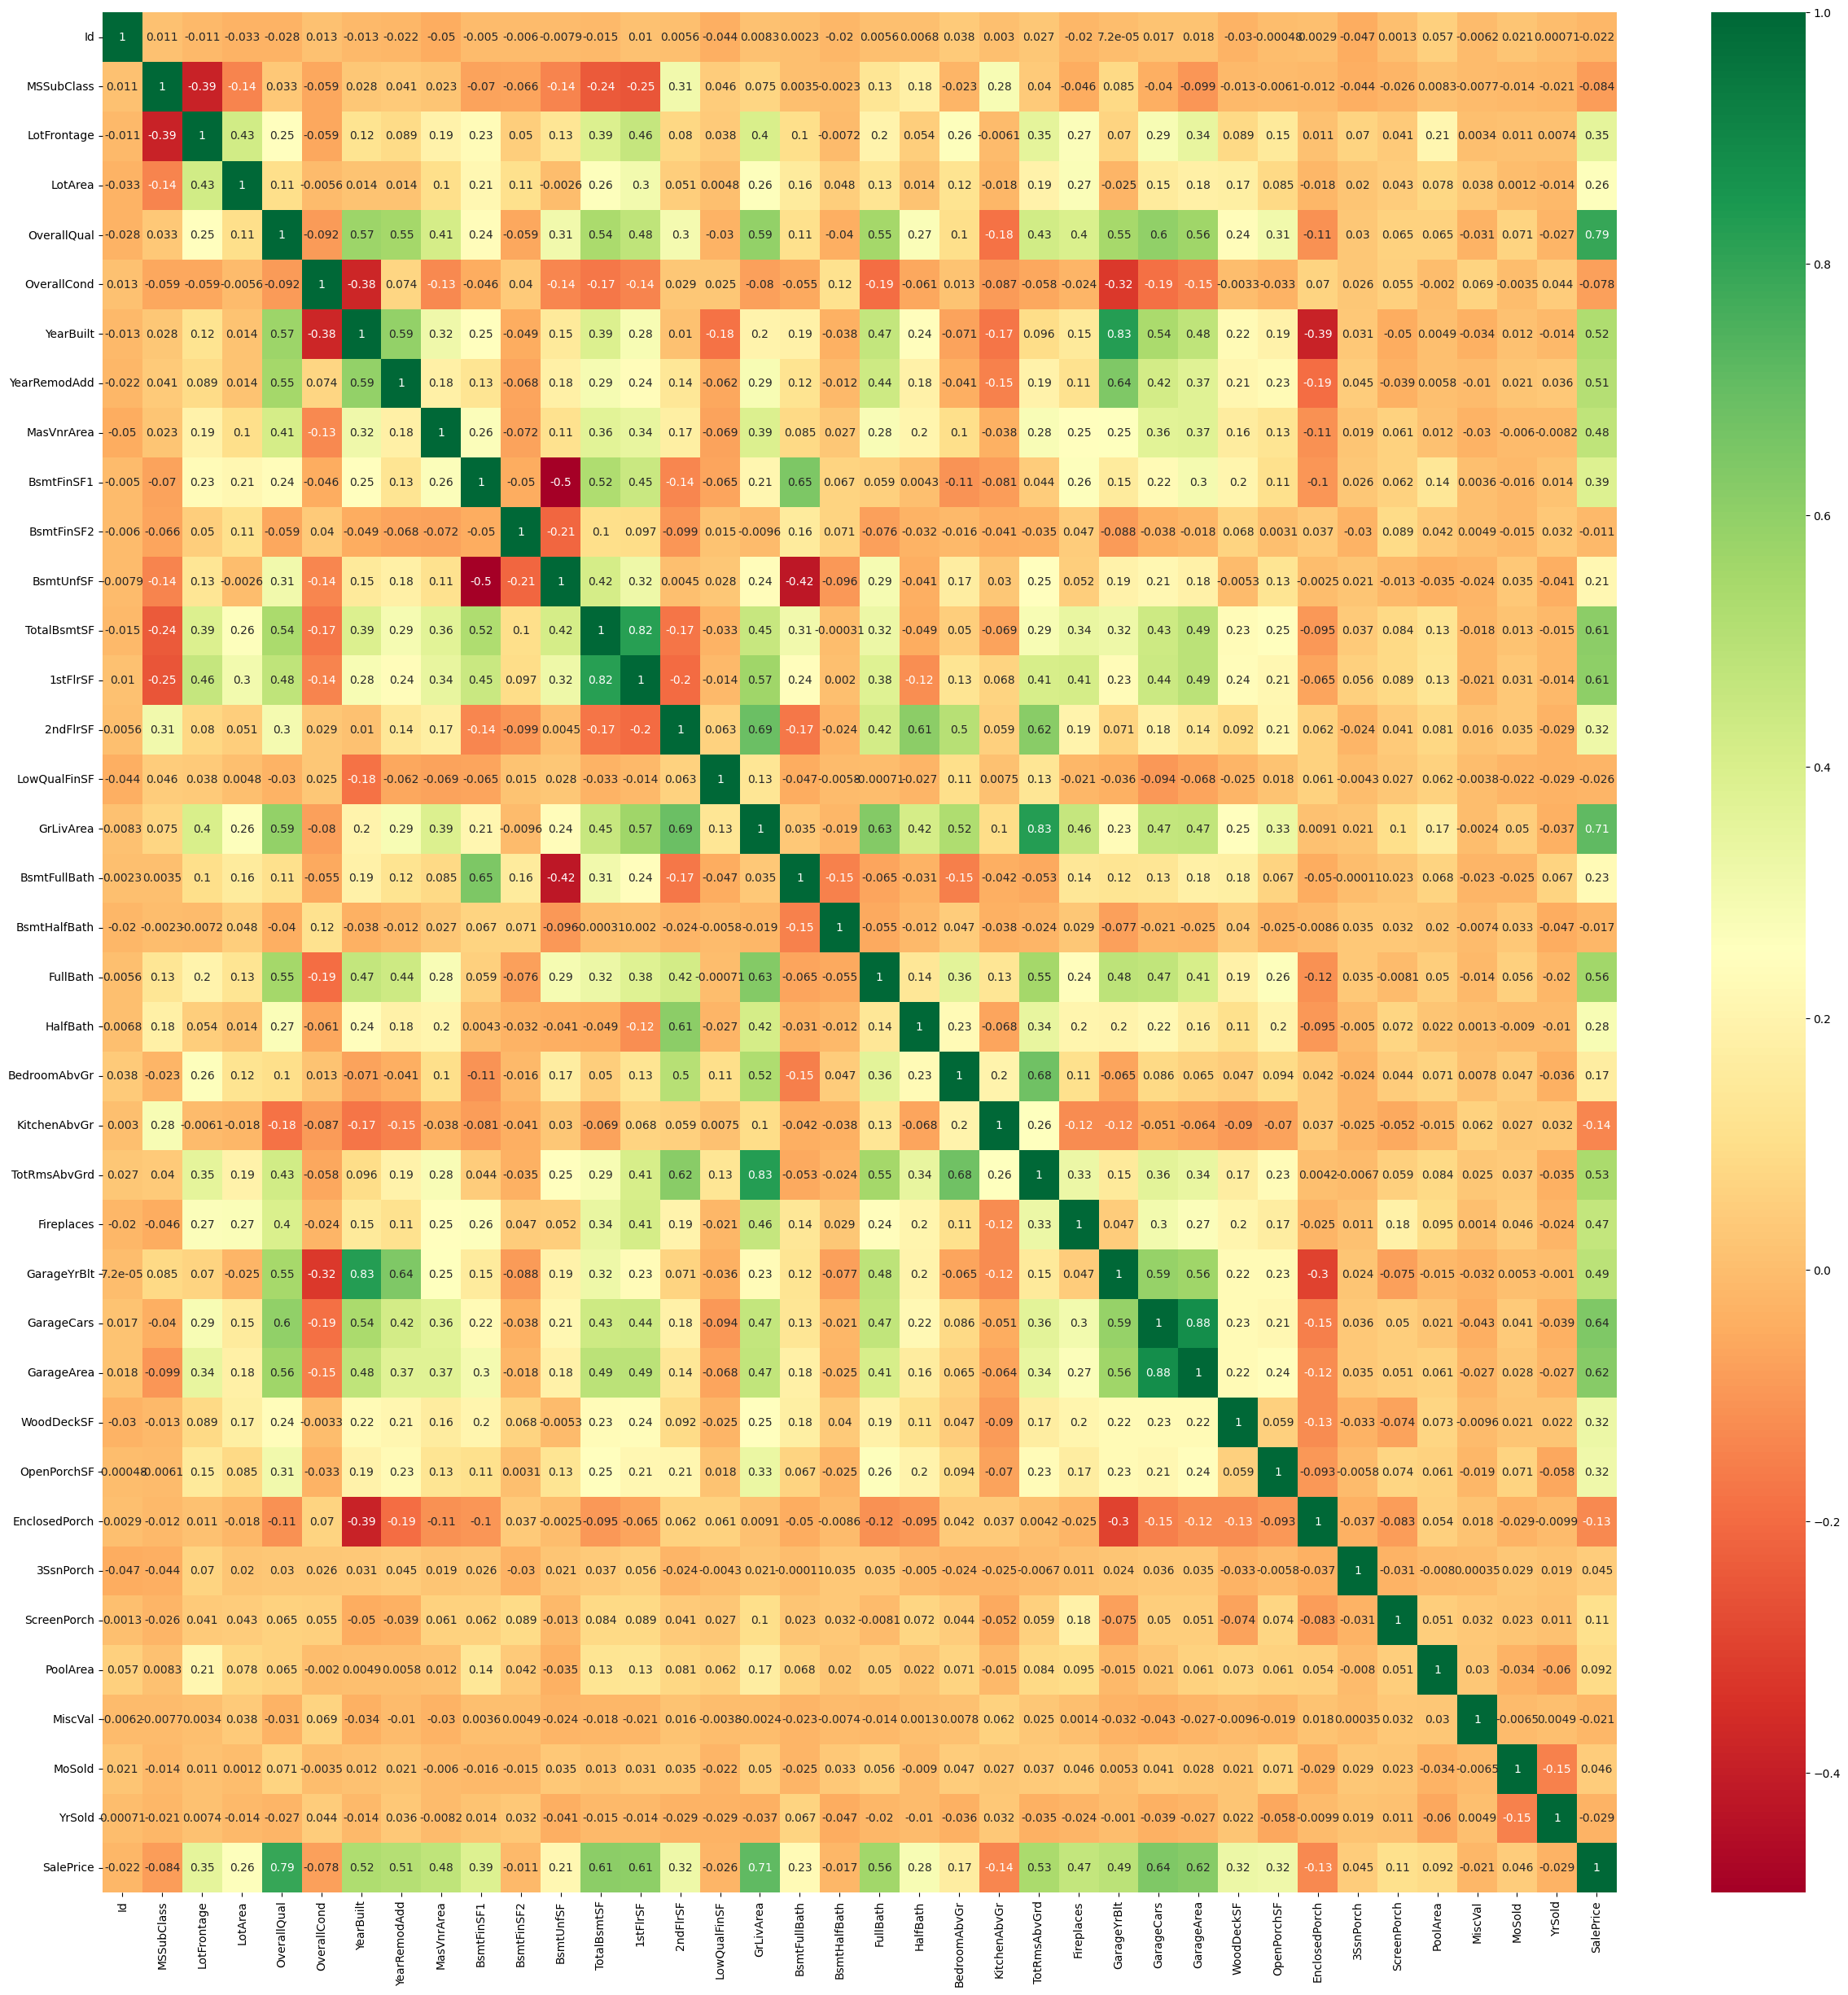

In [47]:
# HeatMap for the top related features in the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df[['PoolArea','Fence','MiscFeature','MiscVal','MoSold','YrSold']].isnull().sum()

PoolArea          0
Fence          1179
MiscFeature    1406
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [ ]:
df[['ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF']].isnull().sum()

ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
dtype: int64

In [ ]:
df[['PavedDrive','GarageCond','GarageQual','GarageArea','GarageCars','GarageFinish','GarageYrBlt','GarageType']].isnull().sum()

PavedDrive       0
GarageCond      81
GarageQual      81
GarageArea       0
GarageCars       0
GarageFinish    81
GarageYrBlt     81
GarageType      81
dtype: int64

In [ ]:
df[['FireplaceQu','Fireplaces','Functional','TotRmsAbvGrd','KitchenQual','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath']].isnull().sum()

FireplaceQu     690
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
dtype: int64

In [ ]:
df[['GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF','Electrical','CentralAir','HeatingQC','Heating','TotalBsmtSF']].isnull().sum()

GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      1
CentralAir      0
HeatingQC       0
Heating         0
TotalBsmtSF     0
dtype: int64

In [ ]:
df[['BsmtUnfSF','BsmtFinSF2','BsmtFinType2','BsmtFinSF1','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual']].isnull().sum()

BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinType2    38
BsmtFinSF1       0
BsmtFinType1    37
BsmtExposure    38
BsmtCond        37
BsmtQual        37
dtype: int64

In [ ]:
df[['PoolQC','Foundation','ExterCond','ExterQual','MasVnrArea','MasVnrType','Exterior2nd','Exterior1st','RoofMatl']].isnull().sum()

PoolQC         1453
Foundation        0
ExterCond         0
ExterQual         0
MasVnrArea        8
MasVnrType        8
Exterior2nd       0
Exterior1st       0
RoofMatl          0
dtype: int64

In [ ]:
df[['RoofStyle','YearRemodAdd','YearBuilt','OverallCond','OverallQual','HouseStyle','BldgType','MSSubClass','MSZoning','LotFrontage']].isnull().sum()

RoofStyle         0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
HouseStyle        0
BldgType          0
MSSubClass        0
MSZoning          0
LotFrontage     259
dtype: int64

In [ ]:
df.isnull().sum()

In [ ]:
df['Electrical'].unique()

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="SalePrice", height=4) \
   .map(plt.scatter, "OverallQual", "GarageArea");
plt.show();

In [ ]:
df.plot(kind='scatter',x='OverallQual',y='SalePrice')
plt.show()

In [ ]:
# Checking the rows that are in format of integer and float inputs
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
df['Alley'].isnull().sum()

In [ ]:
df.isnull()

In [ ]:
df['MiscFeature'].head()

In [ ]:
!pip  install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7bc7b51b39e9ba5b2ee3d1a25d0981878421700a0bbc18d113f146dea68b687f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

<ipython-input-63-cccca3fab876>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Inferences on the Dataset

---


Using the `isnull()` function we can see that maximum  entries of the column `PoolQC` is **empty**.

*So we can drop this column from the main dataset*

**MiscFeature**: Miscellaneous feature not covered in other categories.
In this category also maximum entries are **Null**.

**Note**: Bedroom and kitchen are not a parameter in the dataset they are just abbribiation in the data

`Electrical` column does not improve the accuracy of the model. so we can remove it in the feature selection

`Alley` column is also **empty** and also does not improve the accuracy of the model

`BsmtFinSF2`,`LowQualFinSF`(98.8% Zeros),`EnclosedPorch`(85.8% Zeros), `3SsnPorch`(98.9% Zeros),ScreenPorch (92.1% Zeros), PoolArea(99.1% Zeros), MiscVal(96.4% Zeros),

# **2. Feature Selection and Pre-Processing Data**


In [59]:
Database = df.drop('Fence',axis=1)
Database.drop(['MiscFeature','PoolQC','Id'],axis=1,inplace=True)

In [60]:
Database['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [61]:
Database.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [62]:
type(Database['Electrical'])

pandas.core.series.Series

In [ ]:
# Remove missing entries from a Electrical column
# DF['Electrical'].dropna(inplace=True)
# DF['Electrical'].isnull().sum()
#DF.drop(index) # find how to find index for NA value

In [63]:
# Finding the missing data row
rows_with_missing_values = Database[Database['Electrical'].isnull()].index
print(rows_with_missing_values)

Int64Index([1379], dtype='int64')


In [ ]:
# Dropping the row
Database.drop(1379,inplace=True)

In [ ]:
Database['Electrical'].isnull().sum()

0

In [64]:
# Removing the column with Zero's percentage above 92%
# As they are not providing any efficiency to the model
Database.drop(['BsmtFinSF2','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

# **Fixing the Missing Data**

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from math import remainder

In [65]:
Database.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,5,65.0,8450,1,NaN,0,Lvl,0,0,...,2,0,0,61,0,2,2008,WD,0,208500
1,20,5,80.0,9600,1,NaN,0,Lvl,0,3,...,2,0,298,0,0,5,2007,WD,0,181500
2,60,5,68.0,11250,1,NaN,0,Lvl,0,0,...,2,0,0,42,0,9,2008,WD,0,223500


In [66]:
# Specify the columns you want to keep
columns_to_keep = ['OverallQual', 'YearBuilt', 'YearRemodAdd','MasVnrArea','TotalBsmtSF','BsmtFinSF1','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']

# Drop the columns that are not needed
DB = Database.drop(columns=set(Database.columns) - set(columns_to_keep))


In [67]:
DB.columns
DB.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [68]:
knn = KNNImputer()
Knn_Imputed_table = knn.fit_transform(DB.drop(['SalePrice'],axis=1))

# Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(Knn_Imputed_table,DB['SalePrice'],
                                                test_size=0.2)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
# Specify the columns you want to keep
Data_to_classify_as_OHE=['MSZoning','Street','LotShape','Utilities','LotConfig','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','Electrical','GarageType','Functional','GarageFinish']

# Drop the columns that are not needed
DB_OHE = Database.drop(columns=set(Database.columns) - set(Data_to_classify_as_OHE))

In [79]:
DB_OHE.head()

,MSZoning,Street,LotShape,Utilities,LotConfig,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish
0,5,1,0,0,0,2,2,0,1,1,VinylSd,VinylSd,2,1,1,SBrkr,0,1,1
1,5,1,0,0,3,1,2,0,1,1,MetalSd,MetalSd,1,1,1,SBrkr,0,1,1
2,5,1,0,0,0,2,2,0,1,1,VinylSd,VinylSd,2,1,1,SBrkr,0,1,1
3,5,1,0,0,1,2,2,0,1,1,Wd Sdng,Wd Shng,0,1,1,SBrkr,0,5,2
4,5,1,0,0,3,2,2,0,1,1,VinylSd,VinylSd,2,1,1,SBrkr,0,1,1


In [88]:
DB_OHE.drop(['Electrical','BldgType'],axis=1,inplace=True)

KeyError: ignored

In [101]:
# Splitting the data
X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(DB_OHE,Database['SalePrice'],
                                                test_size=0.2)

In [99]:
X_train_o.dropna(inplace=True)
X_test_o.dropna(inplace=True)

In [102]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clf_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)


In [103]:
clf_boosting.fit(X_train_o,y_train_o)
boosting_pred = clf_boosting.predict(X_test_o)
accuracy_score(y_test_o,boosting_pred)
classification_report(y_test_o,boosting_pred)

ValueError: ignored

In [78]:
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_ohe = ohe.fit(X_train_o[Data_to_classify_as_OHE])
X_test_ohe = ohe.fit_transform(X_test_o[Data_to_classify_as_OHE])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: ignored

In [77]:
X_train_ohe

NameError: ignored

In [72]:
X_train_transformed = np.concatenate((X_train,X_train_ohe),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test,X_test_ohe),axis=1)

NameError: ignored

In [ ]:
# HeatMap for the top related features in the dataset
corrmat = X_train_ohe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

AttributeError: ignored

In [ ]:
# Filter columns with data type 'object'
object_columns = df.select_dtypes(include=['object'])

# Print info for object columns
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

# **Transportation Data in for 0 to n**

In [5]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4}

# Iterate through each row of the 'HeatingQC' column
for index, row in df.iterrows():
    HeatingQC_text = row['HeatingQC']

    # Check if the HeatingQC_text exists in the label_mapping dictionary
    if HeatingQC_text in label_mapping:
        numeric_label = label_mapping[HeatingQC_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'HeatingQC'] = numeric_label

In [6]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'A': 0, 'C': 1, 'FV': 2,'I':3,'RH':4,'RL':5,'RP':6,'RM':7}

# Iterate through each row of the 'MSZoning' column
for index, row in df.iterrows():
    MSZoning_text = row['MSZoning']

    # Check if the MSZoningQC_text exists in the label_mapping dictionary
    if MSZoning_text in label_mapping:
        numeric_label = label_mapping[MSZoning_text]

        # Assign the numeric label to the 'MSZoning' column
        df.at[index, 'MSZoning'] = numeric_label

In [7]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Grvl': 0, 'Pave': 1}

# Iterate through each row of the 'Street' column
for index, row in df.iterrows():
    rooftop_text = row['Street']

    # Check if the Street_text exists in the label_mapping dictionary
    if rooftop_text in label_mapping:
        numeric_label = label_mapping[rooftop_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'Street'] = numeric_label

In [8]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Reg': 0, 'IR1': 1,'IR2':2,'IR3':3}

# Iterate through each row of the 'LotShape' column
for index, row in df.iterrows():
    LotShape_text = row['LotShape']

    # Check if the LotShape_text exists in the label_mapping dictionary
    if LotShape_text in label_mapping:
        numeric_label = label_mapping[LotShape_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'LotShape'] = numeric_label

In [9]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Lvl': 0, 'Bnk': 1,'HLS':2,'Low':3}

# Iterate through each row of the 'LandContour' column
for index, row in df.iterrows():
    LandContour_text = row['LandContour']

    # Check if the LotShape_text exists in the label_mapping dictionary
    if LandContour_text in label_mapping:
        numeric_label = label_mapping[LandContour_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'LotShape'] = numeric_label

In [10]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'AllPub': 0, 'NoSewr': 1,'NoSeWa':2,'ELO':3}

# Iterate through each row of the 'LandContour' column
for index, row in df.iterrows():
    Utilities_text = row['Utilities']

    # Check if the LotShape_text exists in the label_mapping dictionary
    if Utilities_text in label_mapping:
        numeric_label = label_mapping[Utilities_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'Utilities'] = numeric_label

In [11]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Inside': 0, 'Corner': 1,'CulDSac':2,'FR2':3,'FR3':4}

# Iterate through each row of the 'LandContour' column
for index, row in df.iterrows():
    LotConfig_text = row['LotConfig']

    # Check if the LotShape_text exists in the label_mapping dictionary
    if LotConfig_text in label_mapping:
        numeric_label = label_mapping[LotConfig_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'LotConfig'] = numeric_label

In [12]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Gtl': 0, 'Mod': 1,'Sev':2}

# Iterate through each row of the 'LandContour' column
for index, row in df.iterrows():
    LandSlope_text = row['LandSlope']

    # Check if the LotShape_text exists in the label_mapping dictionary
    if LandSlope_text in label_mapping:
        numeric_label = label_mapping[LandSlope_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'LandSlope'] = numeric_label

In [13]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Artery': 0, 'Feedr': 1,'Norm':2,'RRNn':3,'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8}

# Iterate through each row of the 'LandContour' column
for index, row in df.iterrows():
    Condition1_text = row['Condition1']

    # Check if the Condition1_text exists in the label_mapping dictionary
    if Condition1_text in label_mapping:
        numeric_label = label_mapping[Condition1_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'Condition1'] = numeric_label

In [14]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Artery': 0, 'Feedr': 1,'Norm':2,'RRNn':3,'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8}

# Iterate through each row of the 'LandContour' column
for index, row in df.iterrows():
    Condition2_text = row['Condition2']

    # Check if the Condition1_text exists in the label_mapping dictionary
    if Condition2_text in label_mapping:
        numeric_label = label_mapping[Condition2_text]

        # Assign the numeric label to the 'Street' column
        df.at[index, 'Condition2'] = numeric_label

In [15]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'1Fam': 0, '2FmCon': 1,'Duplx':2,'TwnhsE':3,'TwnhsI':4}

# Iterate through each row of the 'BldgType' column
for index, row in df.iterrows():
    BldgType_text = row['BldgType']

    # Check if the BldgType_text exists in the label_mapping dictionary
    if BldgType_text in label_mapping:
        numeric_label = label_mapping[BldgType_text]

        # Assign the numeric label to the 'BldgType' column
        df.at[index, 'BldgType'] = numeric_label

In [16]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'1Story': 0, '1.5Fin': 1,'1.5Unf':2,'2Story':3,'RRAn':4,'2.5Fin':5,'PosA':6,'2.5Unf':7,'SFoyer':8,'SLvl':9}

# Iterate through each row of the 'HouseStyle' column
for index, row in df.iterrows():
    HouseStyle_text = row['HouseStyle']

    # Check if the HouseStyle_text exists in the label_mapping dictionary
    if HouseStyle_text in label_mapping:
        numeric_label = label_mapping[HouseStyle_text]

        # Assign the numeric label to the 'HouseStyle' column
        df.at[index, 'HouseStyle'] = numeric_label

In [17]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Flat': 0, 'Gable': 1, 'Gambrel': 2,'Hip':3,'Mansard':4,'Shed':5}

# Iterate through each row of the 'RoofStyle' column
for index, row in df.iterrows():
    RoofStyle_text = row['RoofStyle']

    # Check if the HeatingQC_text exists in the label_mapping dictionary
    if RoofStyle_text in label_mapping:
        numeric_label = label_mapping[RoofStyle_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'RoofStyle'] = numeric_label

In [18]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'ClyTile': 0, 'CompShg': 1, 'Membran': 2,'Metal':3,'Roll':4,'Tar&Grv':5,'WdShake':6,'WdShngl':7}

# Iterate through each row of the 'RoofMatl' column
for index, row in df.iterrows():
    RoofMatl_text = row['RoofMatl']

    # Check if the HeatingQC_text exists in the label_mapping dictionary
    if RoofMatl_text in label_mapping:
        numeric_label = label_mapping[RoofMatl_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'RoofMatl'] = numeric_label

In [19]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'BrkCmn': 0, 'BrkFace': 1, 'Membran': 2,'CBlock':3,'None':4,'Stone':5}

# Iterate through each row of the 'MasVnrType' column
for index, row in df.iterrows():
    MasVnrType_text = row['MasVnrType']

    # Check if the MasVnrType_text exists in the label_mapping dictionary
    if MasVnrType_text in label_mapping:
        numeric_label = label_mapping[MasVnrType_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'MasVnrType'] = numeric_label

In [20]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4}

# Iterate through each row of the 'ExterQual' column
for index, row in df.iterrows():
    ExterQual_text = row['ExterQual']

    # Check if the ExterQual_text exists in the label_mapping dictionary
    if ExterQual_text in label_mapping:
        numeric_label = label_mapping[ExterQual_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'ExterQual'] = numeric_label

In [21]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4}

# Iterate through each row of the 'ExterCond' column
for index, row in df.iterrows():
    ExterCond_text = row['ExterCond']

    # Check if the ExterQual_text exists in the label_mapping dictionary
    if ExterCond_text in label_mapping:
        numeric_label = label_mapping[ExterCond_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'ExterCond'] = numeric_label

In [22]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'BrkTil': 0, 'CBlock': 1, 'PConc': 2,'Slab':3,'Stone':4,'Wood':5}

# Iterate through each row of the 'Foundation' column
for index, row in df.iterrows():
    Foundation_text = row['Foundation']

    # Check if the Foundation_text exists in the label_mapping dictionary
    if Foundation_text in label_mapping:
        numeric_label = label_mapping[Foundation_text]

        # Assign the numeric label to the 'Foundation' column
        df.at[index, 'Foundation'] = numeric_label

In [23]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4,'NA':5}

# Iterate through each row of the 'ExterCond' column
for index, row in df.iterrows():
    BsmtQual_text = row['BsmtQual']

    # Check if the ExterQual_text exists in the label_mapping dictionary
    if BsmtQual_text in label_mapping:
        numeric_label = label_mapping[BsmtQual_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'BsmtQual'] = numeric_label

In [24]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4,'NA':5}

# Iterate through each row of the 'ExterCond' column
for index, row in df.iterrows():
    BsmtCond_text = row['BsmtCond']

    # Check if the ExterQual_text exists in the label_mapping dictionary
    if BsmtCond_text in label_mapping:
        numeric_label = label_mapping[BsmtCond_text]

        # Assign the numeric label to the 'HeatingQC' column
        df.at[index, 'BsmtCond'] = numeric_label

In [25]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Gd': 0, 'Av': 1, 'Mn': 2,'No':3,'NA':4}

# Iterate through each row of the 'BsmtExposure' column
for index, row in df.iterrows():
    BsmtExposure_text = row['BsmtExposure']

    # Check if the BsmtExposure_text exists in the label_mapping dictionary
    if BsmtExposure_text in label_mapping:
        numeric_label = label_mapping[BsmtExposure_text]

        # Assign the numeric label to the 'BsmtExposure' column
        df.at[index, 'BsmtExposure'] = numeric_label

In [26]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'GLQ': 0, 'ALQ': 1, 'BLQ': 2,'Rec':3,'LwQ':4,'Unf':5,'NA':6}

# Iterate through each row of the 'BsmtExposure' column
for index, row in df.iterrows():
    BsmtFinType1_text = row['BsmtFinType1']

    # Check if the BsmtExposure_text exists in the label_mapping dictionary
    if BsmtFinType1_text in label_mapping:
        numeric_label = label_mapping[BsmtFinType1_text]

        # Assign the numeric label to the 'BsmtExposure' column
        df.at[index, 'BsmtFinType1'] = numeric_label

In [27]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'GLQ': 0, 'ALQ': 1, 'BLQ': 2,'Rec':3,'LwQ':4,'Unf':5,'NA':6}

# Iterate through each row of the 'BsmtExposure' column
for index, row in df.iterrows():
    BsmtFinType2_text = row['BsmtFinType2']

    # Check if the BsmtExposure_text exists in the label_mapping dictionary
    if BsmtFinType2_text in label_mapping:
        numeric_label = label_mapping[BsmtFinType2_text]

        # Assign the numeric label to the 'BsmtExposure' column
        df.at[index, 'BsmtFinType2'] = numeric_label

In [28]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Floor': 0, 'GasA': 1, 'GasW': 2,'Rec':3,'Grav':4,'OthW':5,'Wall':6}

# Iterate through each row of the 'Heating' column
for index, row in df.iterrows():
    Heating_text = row['Heating']

    # Check if the Heating_text exists in the label_mapping dictionary
    if Heating_text in label_mapping:
        numeric_label = label_mapping[Heating_text]

        # Assign the numeric label to the 'Heating' column
        df.at[index, 'Heating'] = numeric_label

In [29]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'N': 0, 'Y': 1}

# Iterate through each row of the 'CentralAir' column
for index, row in df.iterrows():
    CentralAir_text = row['CentralAir']

    # Check if the CentralAir_text exists in the label_mapping dictionary
    if CentralAir_text in label_mapping:
        numeric_label = label_mapping[CentralAir_text]

        # Assign the numeric label to the 'CentralAir' column
        df.at[index, 'CentralAir'] = numeric_label

In [30]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4}

# Iterate through each row of the 'KitchenQual' column
for index, row in df.iterrows():
    KitchenQual_text = row['KitchenQual']

    # Check if the CentralAir_text exists in the label_mapping dictionary
    if KitchenQual_text in label_mapping:
        numeric_label = label_mapping[KitchenQual_text]

        # Assign the numeric label to the 'CentralAir' column
        df.at[index, 'KitchenQual'] = numeric_label

In [31]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Typ': 0, 'Min1': 1, 'Min2': 2,'Mod':3,'Po':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8}

# Iterate through each row of the 'Functional' column
for index, row in df.iterrows():
    Functional_text = row['Functional']

    # Check if the Functional_text exists in the label_mapping dictionary
    if Functional_text in label_mapping:
        numeric_label = label_mapping[Functional_text]

        # Assign the numeric label to the 'Functional' column
        df.at[index, 'Functional'] = numeric_label

In [32]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4,'NA':5}

# Iterate through each row of the 'FireplaceQu' column
for index, row in df.iterrows():
    FireplaceQu_text = row['FireplaceQu']

    # Check if the FireplaceQu_text exists in the label_mapping dictionary
    if FireplaceQu_text in label_mapping:
        numeric_label = label_mapping[FireplaceQu_text]

        # Assign the numeric label to the 'FireplaceQu' column
        df.at[index, 'FireplaceQu'] = numeric_label

In [33]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'2Types': 0, 'Attchd': 1, 'Basment': 2,'BuiltIn':3,'CarPort':4,'Detchd':5,'NA':6}

# Iterate through each row of the 'GarageType' column
for index, row in df.iterrows():
    GarageType_text = row['GarageType']

    # Check if the GarageType_text exists in the label_mapping dictionary
    if GarageType_text in label_mapping:
        numeric_label = label_mapping[GarageType_text]

        # Assign the numeric label to the 'GarageType' column
        df.at[index, 'GarageType'] = numeric_label

In [34]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Fin': 0, 'RFn': 1, 'Unf': 2,'NA':3}

# Iterate through each row of the 'GarageFinish' column
for index, row in df.iterrows():
    GarageFinish_text = row['GarageFinish']

    # Check if the GarageFinish_text exists in the label_mapping dictionary
    if GarageFinish_text in label_mapping:
        numeric_label = label_mapping[GarageFinish_text]

        # Assign the numeric label to the 'GarageFinish' column
        df.at[index, 'GarageFinish'] = numeric_label

In [35]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4,'NA':5}

# Iterate through each row of the 'GarageQual' column
for index, row in df.iterrows():
    GarageQual_text = row['GarageQual']

    # Check if the GarageQual_text exists in the label_mapping dictionary
    if GarageQual_text in label_mapping:
        numeric_label = label_mapping[GarageQual_text]

        # Assign the numeric label to the 'GarageQual' column
        df.at[index, 'GarageQual'] = numeric_label

In [36]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Ex': 0, 'Gd': 1, 'TA': 2,'Fa':3,'Po':4,'NA':5}

# Iterate through each row of the 'GarageCond' column
for index, row in df.iterrows():
    GarageCond_text = row['GarageCond']

    # Check if the GarageQual_text exists in the label_mapping dictionary
    if GarageCond_text in label_mapping:
        numeric_label = label_mapping[GarageCond_text]

        # Assign the numeric label to the 'GarageQual' column
        df.at[index, 'GarageCond'] = numeric_label

In [37]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Y': 0, 'P': 1, 'N': 2}

# Iterate through each row of the 'PavedDrive' column
for index, row in df.iterrows():
    PavedDrive_text = row['PavedDrive']

    # Check if the GarageQual_text exists in the label_mapping dictionary
    if PavedDrive_text in label_mapping:
        numeric_label = label_mapping[PavedDrive_text]

        # Assign the numeric label to the 'PavedDrive' column
        df.at[index, 'PavedDrive'] = numeric_label

In [38]:
# Create a dictionary to map text labels to numeric labels
label_mapping = {'Normal': 0, 'Abnorml': 1, 'AdjLand': 2,'Alloca':3,'Family':4,'Partial':5}

# Iterate through each row of the 'SaleCondition' column
for index, row in df.iterrows():
    SaleCondition_text = row['SaleCondition']

    # Check if the SaleCondition_text exists in the label_mapping dictionary
    if SaleCondition_text in label_mapping:
        numeric_label = label_mapping[SaleCondition_text]

        # Assign the numeric label to the 'SaleCondition' column
        df.at[index, 'SaleCondition'] = numeric_label

In [39]:
Database_text_data = ['HeatingQC','MSZoning','Street','LotShape','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleCondition']

DB_Text_data = df.drop(columns=set(df.columns) - set(Database_text_data))

In [40]:
DB_Text_data.to_csv('output.csv', index=False)

In [41]:
DB_Text_data.drop('BldgType',axis=1,inplace=True)

In [42]:
DB_Text_data.isnull().sum()

MSZoning           0
Street             0
LotShape           0
Utilities          0
LotConfig          0
LandSlope          0
Condition1         0
Condition2         0
HouseStyle         0
RoofStyle          0
RoofMatl           0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleCondition      0
dtype: int64

In [43]:
db_not_null = DB_Text_data.drop(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageCond','GarageQual'],axis=1)

In [45]:
#get correlations of each features in dataset
# corrmat = db_not_null.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(db_not_null[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [47]:
#db_not_null['SalePrice']

In [50]:
knn = KNNImputer()
Knn_Imputed_table = knn.fit_transform(db_not_null)

# Splitting the Data
X_train1,X_test1,y_train1,y_test1 = train_test_split(Knn_Imputed_table,df['SalePrice'],
                                                test_size=0.2)

ValueError: ignored

# **Model Training**

In [105]:
# Specify the columns you want to keep
columns_to_keep = ['LotArea', 'OverallQual', 'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']

# Drop the columns that are not needed
df_training = df.drop(columns=set(df.columns) - set(columns_to_keep))


In [106]:
df_training.corr()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
LotArea,1.000000,0.105806,0.014228,0.013788,0.104160,0.214103,0.299475,0.050986,0.263116,0.158155,0.126031,0.190015,0.271364,-0.024947,0.154871,0.180403,0.263843
OverallQual,0.105806,1.000000,0.572323,0.550684,0.411876,0.239666,0.476224,0.295493,0.593007,0.111098,0.550600,0.427452,0.396765,0.547766,0.600671,0.562022,0.790982
YearBuilt,0.014228,0.572323,1.000000,0.592855,0.315707,0.249503,0.281986,0.010308,0.199010,0.187599,0.468271,0.095589,0.147716,0.825667,0.537850,0.478954,0.522897
YearRemodAdd,0.013788,0.550684,0.592855,1.000000,0.179618,0.128451,0.240379,0.140024,0.287389,0.119470,0.439046,0.191740,0.112581,0.642277,0.420622,0.371600,0.507101
MasVnrArea,0.104160,0.411876,0.315707,0.179618,1.000000,0.264736,0.344501,0.174561,0.390857,0.085310,0.276833,0.280682,0.249070,0.252691,0.364204,0.373066,0.477493
BsmtFinSF1,0.214103,0.239666,0.249503,0.128451,0.264736,1.000000,0.445863,-0.137079,0.208171,0.649212,0.058543,0.044316,0.260011,0.153484,0.224054,0.296970,0.386420
1stFlrSF,0.299475,0.476224,0.281986,0.240379,0.344501,0.445863,1.000000,-0.202646,0.566024,0.244671,0.380637,0.409516,0.410531,0.233449,0.439317,0.489782,0.605852
2ndFlrSF,0.050986,0.295493,0.010308,0.140024,0.174561,-0.137079,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.616423,0.194561,0.070832,0.183926,0.138347,0.319334
GrLivArea,0.263116,0.593007,0.199010,0.287389,0.390857,0.208171,0.566024,0.687501,1.000000,0.034836,0.630012,0.825489,0.461679,0.231197,0.467247,0.468997,0.708624
BsmtFullBath,0.158155,0.111098,0.187599,0.119470,0.085310,0.649212,0.244671,-0.169494,0.034836,1.000000,-0.064512,-0.053275,0.137928,0.124553,0.131881,0.179189,0.227122


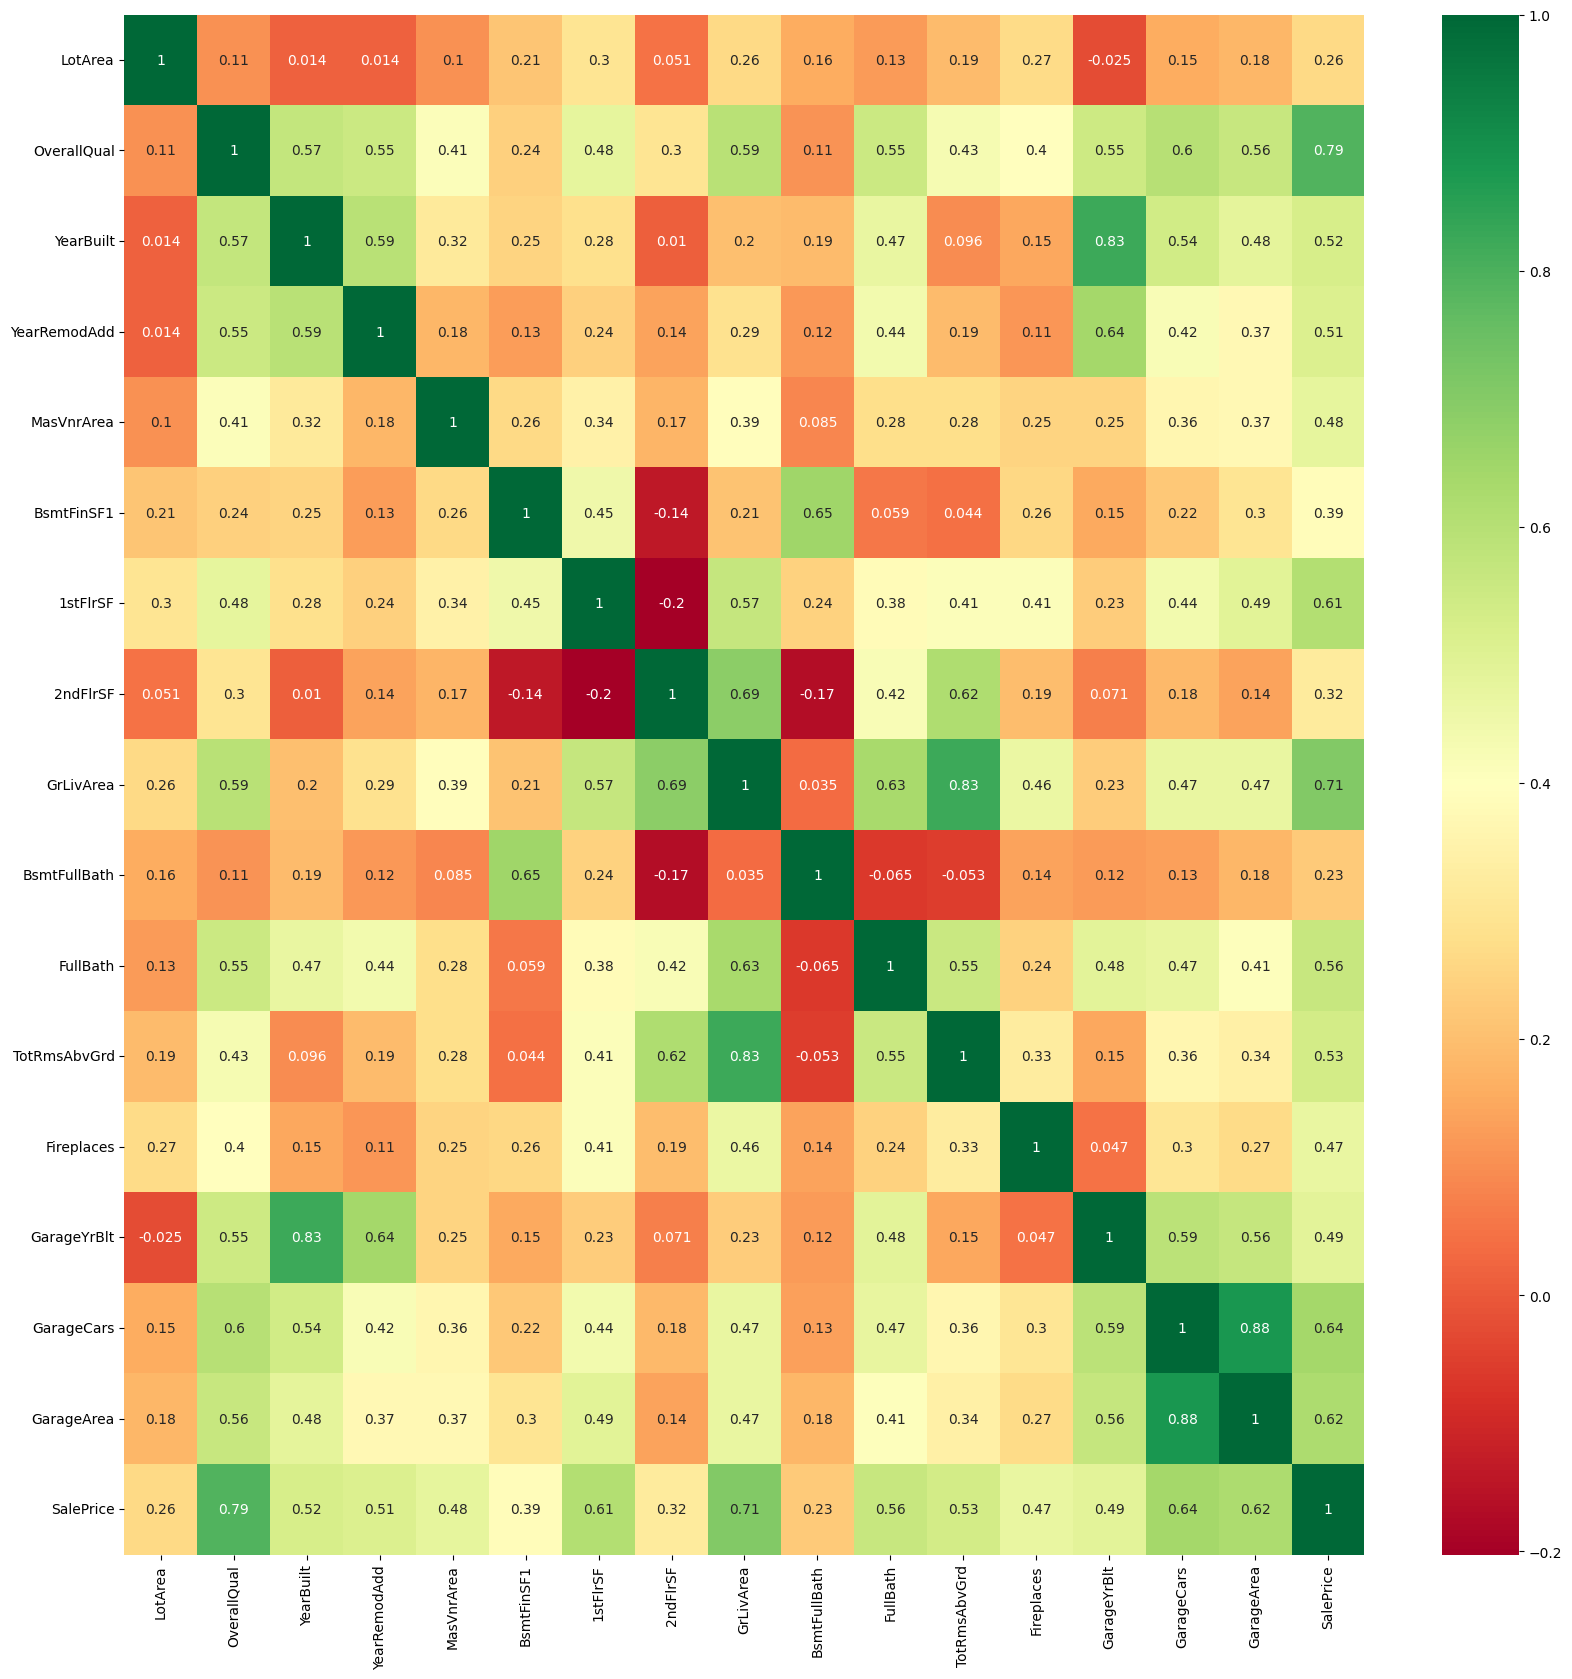

In [107]:
corrmat = df_training.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_training[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [108]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
Knn_Imputed_table= imputer.fit_transform(df_training.drop(columns=['SalePrice']))
X_train_text,X_test_text,y_train_text,y_test_text = train_test_split(Knn_Imputed_table,df_training['SalePrice'],
                                                test_size=0.2)

# **KNN Algorithm**

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier()

In [110]:
error_rate = []
[True, False, ...  ]
# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_text,y_train_text)
    pred_i = knn.predict(X_test_text)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

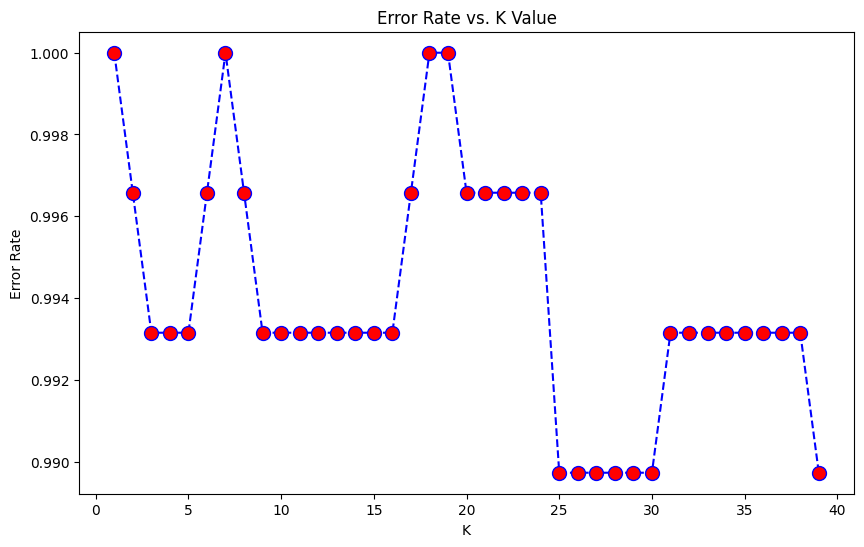

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [157]:
# KNN neighbour = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_text,y_train_text)
knn_pred = knn.predict(X_test_text)
accuracy_score(pred,y_test_text)

0.010273972602739725

In [159]:
print(classification_report(y_test_text,knn_pred,zero_division=1))

              precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       39300       1.00      0.00      0.00         1
       52000       0.00      1.00      0.00         0
       55000       1.00      0.00      0.00         1
       62383       1.00      0.00      0.00         1
       67000       0.00      1.00      0.00         0
       72500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       76000       0.00      1.00      0.00         0
       76500       1.00      0.00      0.00         1
       79000       1.00      0.00      0.00         1
       79900       0.00      1.00      0.00         0
       80000       1.00      0.00      0.00         2
       82000       1.00      0.00      0.00         2
       82500       0.00      1.00      0.00         0
       83000       0.00      1.00      0.00         0
       83500       0.00      1.00      0.00         0
       84500       1.00    

In [113]:
# KNN neighbour = 2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_text,y_train_text)
pred2 = knn.predict(X_test_text)
accuracy_score(pred2,y_test_text)

0.00684931506849315

In [121]:
print(classification_report(y_test_text,pred2,zero_division=1))

              precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       39300       1.00      0.00      0.00         1
       52000       0.00      1.00      0.00         0
       55000       1.00      0.00      0.00         1
       62383       1.00      0.00      0.00         1
       66500       0.00      1.00      0.00         0
       67000       0.00      1.00      0.00         0
       68500       0.00      1.00      0.00         0
       72500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       76000       0.00      1.00      0.00         0
       76500       1.00      0.00      0.00         1
       79000       1.00      0.00      0.00         1
       79500       0.00      1.00      0.00         0
       79900       0.00      1.00      0.00         0
       80000       1.00      0.00      0.00         2
       82000       1.00      0.00      0.00         2
       82500       0.00    

# **Naive-Based Algo**

# **Naive Based Classification**

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

Mb = MultinomialNB()
Bb = BernoulliNB()
Gb = GaussianNB()

In [124]:
Mb.fit(X_train_text,y_train_text)
y_pred = Mb.predict(X_test_text)
accuracy_score(y_pred,y_test_text)

0.0

In [160]:
Bb.fit(X_train_text,y_train_text)
bb_pred2 = Bb.predict(X_test_text)
accuracy_score(y_pred,y_test_text)

0.0

In [126]:
Gb.fit(X_train_text,y_train_text)
y_pred3 = Gb.predict(X_test_text)
accuracy_score(y_pred,y_test_text)

0.0

In [161]:
print(classification_report(y_test_text,bb_pred2,zero_division=1))

              precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       39300       1.00      0.00      0.00         1
       55000       1.00      0.00      0.00         1
       62383       1.00      0.00      0.00         1
       72500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       76500       1.00      0.00      0.00         1
       79000       1.00      0.00      0.00         1
       80000       1.00      0.00      0.00         2
       82000       1.00      0.00      0.00         2
       84500       1.00      0.00      0.00         1
       85000       0.00      1.00      0.00         0
       86000       1.00      0.00      0.00         1
       87000       1.00      0.00      0.00         2
       88000       1.00      0.00      0.00         3
       89000       1.00      0.00      0.00         1
       89500       1.00      0.00      0.00         1
       94500       1.00    

# **Support Vector Machines (SVM)**

In [127]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')

In [128]:
clf.fit(X_train_text,y_train_text)
svm_pred = clf.predict(X_test_text)
accuracy_score(svm_pred,y_test_text)

0.003424657534246575

# **Decision Tree**

In [138]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()

In [139]:
clf_tree.fit(X_train_text,y_train_text)
decision_pred = clf_tree.predict(X_test_text)
accuracy_score(decision_pred,y_test_text)
print(classification_report(y_test_text,decision_pred,zero_division=1))

              precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       39300       1.00      0.00      0.00         1
       55000       1.00      0.00      0.00         1
       60000       0.00      1.00      0.00         0
       62383       1.00      0.00      0.00         1
       68400       0.00      1.00      0.00         0
       68500       0.00      1.00      0.00         0
       72500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       76500       1.00      0.00      0.00         1
       78000       0.00      1.00      0.00         0
       79000       1.00      0.00      0.00         1
       80000       0.00      0.00      0.00         2
       82000       1.00      0.00      0.00         2
       82500       0.00      1.00      0.00         0
       83500       0.00      1.00      0.00         0
       84500       1.00      0.00      0.00         1
       85000       0.00    

# **Random Forest**

In [130]:
from sklearn.ensemble import RandomForestClassifier
clf_random_tree = RandomForestClassifier(max_depth=2, random_state=0)

In [131]:
clf_random_tree.fit(X_train_text,y_train_text)
random_pred = clf_random_tree.predict(X_test_text)
accuracy_score(random_pred,y_test_text)


0.00684931506849315

In [132]:
print(classification_report(y_test_text,random_pred,zero_division=1))

              precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       39300       1.00      0.00      0.00         1
       55000       1.00      0.00      0.00         1
       60000       0.00      1.00      0.00         0
       62383       1.00      0.00      0.00         1
       72500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       76500       1.00      0.00      0.00         1
       79000       1.00      0.00      0.00         1
       80000       1.00      0.00      0.00         2
       82000       1.00      0.00      0.00         2
       84500       1.00      0.00      0.00         1
       86000       0.33      1.00      0.50         1
       87000       1.00      0.00      0.00         2
       88000       1.00      0.00      0.00         3
       89000       1.00      0.00      0.00         1
       89500       1.00      0.00      0.00         1
       94000       0.00    

# **Boosting**

In [133]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clf_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [134]:
clf_boosting.fit(X_train_text,y_train_text)
boosting_pred = clf_boosting.predict(X_test_text)
accuracy_score(y_test_text,boosting_pred)


0.003424657534246575

In [135]:
print(classification_report(y_test_text,boosting_pred,zero_division=1))

              precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       39300       1.00      0.00      0.00         1
       55000       1.00      0.00      0.00         1
       62383       1.00      0.00      0.00         1
       72500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       76500       1.00      0.00      0.00         1
       79000       1.00      0.00      0.00         1
       80000       1.00      0.00      0.00         2
       82000       1.00      0.00      0.00         2
       84000       0.00      1.00      0.00         0
       84500       1.00      0.00      0.00         1
       86000       1.00      0.00      0.00         1
       87000       1.00      0.00      0.00         2
       88000       1.00      0.00      0.00         3
       89000       1.00      0.00      0.00         1
       89500       1.00      0.00      0.00         1
       93000       0.00    

In [164]:
from sklearn.metrics import mean_squared_error
print(f"Gradient Boosting MSE: {mean_squared_error(y_test_text, boosting_pred,squared=False)}")
print(f"Random forest MSE: {mean_squared_error(y_test_text, random_pred,squared=False)}")
print(f"Decision Tree MSE: {mean_squared_error(y_test_text, decision_pred,squared=False)}")
print(f"Support vector machine MSE: {mean_squared_error(y_test_text, svm_pred,squared=False)}")
print(f"Naive based BernoulliNB MSE: {mean_squared_error(y_test_text, bb_pred2,squared=False)}")
print(f"KNN Neigh=1 MSE: {mean_squared_error(y_test_text, knn_pred,squared=False)}")

Gradient Boosting MSE: 83410.11422347995
Random forest MSE: 75029.42370467389
Decision Tree MSE: 57562.13580679934
Support vector machine MSE: 87655.45429709906
Naive based BernoulliNB MSE: 79874.82984021578
KNN Neigh=1 MSE: 60347.168193171514


In [165]:
import math

mse_values = [83410.11422347995, 75029.42370467389, 57562.13580679934, 87655.45429709906, 79874.82984021578, 60347.168193171514]

rmse_values = [math.sqrt(mse) for mse in mse_values]

best_rmse = min(rmse_values)

# Find the index of the best RMSE value
best_rmse_index = rmse_values.index(best_rmse)

print(f"The best RMSE value is: {best_rmse}")
print(f"The best model is at index: {best_rmse_index}")


The best RMSE value is: 239.92110329606135
The best model is at index: 2


# **Best Model for RMSE Imputation**

**The best RMSE value is**: 239.92110329606135 <br>
Model: **Random Forest** <br>
**Weighted Avg for Random Forest** <br>
**Precision** =  0.96 <br>
**Recall** = 0.01    <br>
**F1-score** =  0.00  <br>
**Support** = 292


In [166]:
# Best model to predict the nature of the     precision.  recall.    f1-score  support
# Gradient boosting with       weighted avg       0.94      0.00      0.00       292
# Random forest with precision weighted avg       0.96      0.01      0.00       292
# Decision Tree with precision weighted avg       0.67      0.01      0.01       292
# Support vector machine       weighted avg       0.96      0.00      0.00       292
# Naive based BernoulliNB      weighted avg       0.94      0.01      0.00       292
# KNN Neigh=1                  weighted avg       0.67      0.01      0.01       292

In [167]:
path= '/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv'
df_test = pd.read_csv(path)

In [168]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [169]:
# Specify the columns you want to keep
columns_to_keep = ['LotArea', 'OverallQual', 'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']

# Drop the columns that are not needed
df_training_2 = df_test.drop(columns=set(df_test.columns) - set(columns_to_keep))


In [173]:
df_training_2.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [172]:
df_training_2.dropna(inplace=True)

In [174]:
Predition = clf_random_tree.predict(df_training_2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
